# Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Input
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_columns', None)

# Load Data

In [83]:
df =pd.read_csv("FootballCoUkOutput.csv")
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,field106,field107,field108,field109,field110,field111,field112,field113,field114,field115,field116,field117,field118,field119,bv_poisson_home_win_prob,bv_poisson_draw_prob,bv_poisson_away_win_prob,bv_poisson_home_goal_exp,bv_poisson_away_goal_exp,dixoncoles_home_win_prob,dixoncoles_draw_prob,dixoncoles_away_win_prob,dixoncoles_home_goal_exp,dixoncoles_away_goal_exp,poisson_home_win_prob,poisson_draw_prob,poisson_away_win_prob,poisson_home_goal_exp,poisson_away_goal_exp
0,E0,12/9/2020,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.20,1.53,6.50,4.20,1.55,6.55,4.55,1.60,5.94,4.34,1.55,1.72,2.10,1.80,2.13,1.84,2.18,1.76,2.10,1.00,1.93,1.97,1.96,1.96,2.00,1.99,1.93,1.95,5.00,4.00,1.66,5.50,4.00,1.62,5.25,3.90,1.67,5.48,3.98,1.69,5.50,3.8,1.65,5.50,3.90,1.67,5.75,4.20,1.71,5.36,3.93,1.67,2.0,1.80,2.06,1.86,2.10,1.92,2.00,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.220519,0.241809,0.537658,0.984754,1.683436,0.225083,0.236026,0.538891,1.031821,1.733989,0.224529,0.237068,0.538403,1.031786,1.734121
1,E0,12/9/2020,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.20,2.35,3.20,3.20,2.40,3.36,3.36,2.50,3.18,3.22,2.39,2.20,1.66,2.34,1.68,2.36,1.73,2.24,1.67,0.25,1.85,2.05,1.88,2.05,1.88,2.07,1.84,2.03,3.00,3.25,2.40,3.00,3.30,2.40,3.05,2.90,2.45,3.09,3.27,2.54,3.10,3.1,2.45,3.10,3.25,2.45,3.25,3.33,2.55,3.08,3.22,2.47,2.2,1.66,2.26,1.72,2.27,1.78,2.18,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539161,0.243895,0.216932,1.661924,0.957357,0.540040,0.238202,0.221758,1.709996,1.003448,0.539528,0.239262,0.221211,1.710061,1.003426
2,E0,12/9/2020,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.00,10.00,1.30,5.75,10.50,1.35,6.50,10.75,1.30,5.96,9.68,1.53,2.50,1.56,2.60,1.56,2.68,1.52,2.53,-1.50,1.95,1.95,1.97,1.95,2.00,2.08,1.90,1.97,1.25,6.00,11.00,1.25,6.25,11.00,1.30,6.00,9.00,1.28,6.34,11.38,1.25,6.0,12.00,1.29,6.00,11.50,1.30,6.75,12.27,1.28,6.16,10.63,1.5,2.62,1.51,2.76,1.53,2.82,1.50,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.759769,0.148417,0.091386,2.595396,0.794366,0.756926,0.147315,0.095759,2.638199,0.840955,0.756650,0.147937,0.095413,2.638349,0.840849
3,E0,12/9/2020,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.50,3.40,2.15,3.40,3.60,2.24,3.70,3.60,2.15,3.48,3.42,1.90,1.90,2.00,1.91,2.05,1.95,1.97,1.86,-0.50,2.07,1.72,2.17,1.78,2.17,1.81,2.12,1.75,1.95,3.60,3.75,1.95,3.70,3.75,2.05,3.25,3.75,2.04,3.59,3.92,2.00,3.5,3.80,2.00,3.50,3.90,2.07,3.78,3.99,2.01,3.57,3.79,1.9,1.90,2.00,1.92,2.00,2.05,1.91,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387393,0.245479,0.367118,1.495695,1.449965,0.389461,0.240469,0.370070,1.537769,1.493471,0.388856,0.241512,0.369631,1.537536,1.493619
4,E0,13/09/2020,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0,0,3.80,3.60,1.95,3.70,3.60,2.00,3.85,3.20,2.00,4.00,3.59,2.00,3.80,3.60,1.95,4.00,3.50,1.95,4.00,3.82,2.04,3

# Basic EDA

In [84]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,field106,field107,field108,field109,field110,field111,field112,field113,field114,field115,field116,field117,field118,field119,bv_poisson_home_win_prob,bv_poisson_draw_prob,bv_poisson_away_win_prob,bv_poisson_home_goal_exp,bv_poisson_away_goal_exp,dixoncoles_home_win_prob,dixoncoles_draw_prob,dixoncoles_away_win_prob,dixoncoles_home_goal_exp,dixoncoles_away_goal_exp,poisson_home_win_prob,poisson_draw_prob,poisson_away_win_prob,poisson_home_goal_exp,poisson_away_goal_exp
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3276.000000,3276.000000,3276.000000,3236.000000,3236.000000,3236.000000,3420.000000,3420.000000,3420.000000,3329.000000,3329.000000,3329.000000,3411.000000,3411.000000,3411.000000,3080.000000,3080.000000,3080.000000,3420.000000,3420.000000,3420.000000,3419.000000,3419.000000,3412.000000,3412.000000,3420.000000,3417.000000,3417.000000,3420.000000,3420.000000,3420.000000,3420.000000,3417.000000,3037.000000,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000,1900.000000,1900.000000,1888.000000,1508.000000,1508.00000,1335.000000,1335.000000,1335.000000,1520.000000,1379.000000,1379.000000,1379.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1429.000000,1429.000000,1429.000000,1520.000000,1520.000000,1519.000000,1519.000000,1513.000000,1513.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1519.000000,1519.000000,1520.000000,1517.000000,1516.000000,1519.000000,1520.000000,1520.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000
mean,1.538596,1.265789,0.694444,0.554678,14.148830,11.596491,4.814035,3.999415,10.654678,11.046491,5.801170,4.726316,1.624561,1.825439,0.057018,0.077778,2.896760,4.217263,4.753301,2.824463,4.103901,4.528996,2.779033,4.005380,4.379920,2.873795,4.160950,4.705199,2.908681,4.193121,4.845194,2.892806,3.985034,4.739710,3.008058,4.352412,5.014662,16.595878,3.837076,4.074225,12.196247,3.233331,3.558631,3.470445,14.661053,2.792898,2.540638,10.624456,1.294327,9.432503,1.271325,1.945631,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.345150,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383000,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.080020,1.875882,2.403974,1.715789,2.541737,-0.309868,1.946421,1.964842,1.954632,1.971605,1.987842,2.003026,1.925105,1.939237,1.983079,2.006079,0.440366,0.223952,0.335496,1.541491,1.265634,0.442218,0.219211,0.338571,1.586436,1.311753,0.441741,0.220173,0.338086,1.586442,1.311734
std,1.319184,1.207294,0.844038,0.771452,5.753269,5.024921,2.659684,2.322745,3.435154,3.545699,3.118635,2.735478,1.268782,1.313505,0.240576,0.278566,2.035907,1.301857,4.025759,1.909767,1.223279,3.707279,1.831599,1.105776,3.451515,2.012271,1.276641,4.035861,2.045833,1.274793,4.218699,2.061696,1.17685

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Columns: 134 entries, Div to poisson_away_goal_exp
dtypes: float64(111), int64(16), object(7)
memory usage: 3.5+ MB


In [86]:
df.columns


Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR',
       ...
       'dixoncoles_home_win_prob', 'dixoncoles_draw_prob',
       'dixoncoles_away_win_prob', 'dixoncoles_home_goal_exp',
       'dixoncoles_away_goal_exp', 'poisson_home_win_prob',
       'poisson_draw_prob', 'poisson_away_win_prob', 'poisson_home_goal_exp',
       'poisson_away_goal_exp'],
      dtype='object', length=134)

In [87]:
df.shape

(3420, 134)

In [88]:
home_teams = df['HomeTeam'].unique()
print("Home Teams:", home_teams)


Home Teams: ['Fulham' 'Crystal Palace' 'Liverpool' 'West Ham' 'West Brom' 'Tottenham'
 'Brighton' 'Sheffield United' 'Everton' 'Leeds' 'Man United' 'Arsenal'
 'Southampton' 'Newcastle' 'Chelsea' 'Leicester' 'Aston Villa' 'Wolves'
 'Burnley' 'Man City' 'Brentford' 'Watford' 'Norwich' 'Ipswich'
 "Nott'm Forest" 'Bournemouth' 'Luton' 'Stoke' 'Swansea' 'Huddersfield'
 'Hull' 'Middlesbrough' 'Sunderland' 'QPR' 'Cardiff']


In [89]:

away_teams = df['AwayTeam'].unique()
print("Away Teams:", away_teams)

Away Teams: ['Arsenal' 'Southampton' 'Leeds' 'Newcastle' 'Leicester' 'Everton'
 'Chelsea' 'Wolves' 'West Brom' 'Fulham' 'Crystal Palace' 'West Ham'
 'Tottenham' 'Brighton' 'Liverpool' 'Burnley' 'Sheffield United'
 'Man City' 'Man United' 'Aston Villa' 'Brentford' 'Norwich' 'Watford'
 'Bournemouth' 'Ipswich' "Nott'm Forest" 'Luton' 'Huddersfield' 'Stoke'
 'Swansea' 'Sunderland' 'Hull' 'Middlesbrough' 'QPR' 'Cardiff']


In [90]:
matchups = df[['Date', 'HomeTeam', 'AwayTeam']]
print(matchups.head(18))

          Date          HomeTeam          AwayTeam
0    12/9/2020            Fulham           Arsenal
1    12/9/2020    Crystal Palace       Southampton
2    12/9/2020         Liverpool             Leeds
3    12/9/2020          West Ham         Newcastle
4   13/09/2020         West Brom         Leicester
5   13/09/2020         Tottenham           Everton
6   14/09/2020          Brighton           Chelsea
7   14/09/2020  Sheffield United            Wolves
8   19/09/2020           Everton         West Brom
9   19/09/2020             Leeds            Fulham
10  19/09/2020        Man United    Crystal Palace
11  19/09/2020           Arsenal          West Ham
12  20/09/2020       Southampton         Tottenham
13  20/09/2020         Newcastle          Brighton
14  20/09/2020           Chelsea         Liverpool
15  20/09/2020         Leicester           Burnley
16  21/09/2020       Aston Villa  Sheffield United
17  21/09/2020            Wolves          Man City


In [91]:
df.isnull().sum()

Div                        0
Date                       0
HomeTeam                   0
AwayTeam                   0
FTHG                       0
                        ... 
poisson_home_win_prob    114
poisson_draw_prob        114
poisson_away_win_prob    114
poisson_home_goal_exp    114
poisson_away_goal_exp    114
Length: 134, dtype: int64

In [92]:
100*df.isnull().sum()/df.shape[0]

Div                      0.000000
Date                     0.000000
HomeTeam                 0.000000
AwayTeam                 0.000000
FTHG                     0.000000
                           ...   
poisson_home_win_prob    3.333333
poisson_draw_prob        3.333333
poisson_away_win_prob    3.333333
poisson_home_goal_exp    3.333333
poisson_away_goal_exp    3.333333
Length: 134, dtype: float64

In [93]:
columns_to_fill = [
    'poisson_home_win_prob','poisson_draw_prob','poisson_away_win_prob','poisson_home_goal_exp','poisson_away_goal_exp','PAHA','MaxAHH','MaxAHA','AvgAHH','AvgAHA',
    'B365CH', 'B365CD',	'B365CA', 'BWCH', 'BWCD', 'BWCA','IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH','WHCD','WHCA','VCCH','VCCD','VCCA','MaxCH',
    'MaxCD','MaxCA','AvgCH','AvgCD','AvgCA','B365C>2.5','B365C<2.5','PC>2.5','PC<2.5','MaxC>2.5','MaxC<2.5','AvgC>2.5','AvgC<2.5','AHCh','B365CAHH',
    'B365CAHA','PCAHH',	'PCAHA','MaxCAHH','MaxCAHA','AvgCAHH','AvgCAHA'
]

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())

In [94]:
df.drop(columns=[
    "field106", "field107", "field108", "field109", "field110", "field111", "field112",
    "field113", "field114", "field115", "field116", "field117", "field118", "field119"

], inplace=True, errors='ignore')

In [95]:
df.isnull().sum()

Div                      0
Date                     0
HomeTeam                 0
AwayTeam                 0
FTHG                     0
                        ..
poisson_home_win_prob    0
poisson_draw_prob        0
poisson_away_win_prob    0
poisson_home_goal_exp    0
poisson_away_goal_exp    0
Length: 120, dtype: int64

In [96]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,bv_poisson_home_win_prob,bv_poisson_draw_prob,bv_poisson_away_win_prob,bv_poisson_home_goal_exp,bv_poisson_away_goal_exp,dixoncoles_home_win_prob,dixoncoles_draw_prob,dixoncoles_away_win_prob,dixoncoles_home_goal_exp,dixoncoles_away_goal_exp,poisson_home_win_prob,poisson_draw_prob,poisson_away_win_prob,poisson_home_goal_exp,poisson_away_goal_exp
0,E0,12/9/2020,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0,0,6.00,4.33,1.53,5.50,4.25,1.57,6.00,3.90,1.57,6.16,4.51,1.56,6.50,4.20,1.53,6.50,4.20,1.55,6.55,4.55,1.60,5.94,4.34,1.55,1.72,2.10,1.80,2.13,1.84,2.18,1.76,2.10,1.00,1.93,1.97,1.96,1.960000,2.000000,1.990000,1.930000,1.950000,5.000000,4.000000,1.660000,5.500000,4.000000,1.62000,5.250000,3.900000,1.670000,5.480000,3.980000,1.690000,5.500000,3.800000,1.650000,5.500000,3.900000,1.670000,5.750000,4.200000,1.710000,5.36000,3.930000,1.670000,2.000000,1.800000,2.060000,1.860000,2.100000,1.920000,2.000000,1.840,0.750000,2.010000,1.890000,2.020000,1.910000,2.130000,1.920000,2.02000,1.870000,0.220519,0.241809,0.537658,0.984754,1.683436,0.225083,0.236026,0.538891,1.031821,1.733989,0.224529,0.237068,0.538403,1.031786,1.734121
1,E0,12/9/2020,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0,0,3.10,3.25,2.37,3.00,3.20,2.45,3.15,2.95,2.40,3.32,3.29,2.40,3.20,3.20,2.35,3.20,3.20,2.40,3.36,3.36,2.50,3.18,3.22,2.39,2.20,1.66,2.34,1.68,2.36,1.73,2.24,1.67,0.25,1.85,2.05,1.88,2.050000,1.880000,2.070000,1.840000,2.030000,3.000000,3.250000,2.400000,3.000000,3.300000,2.40000,3.050000,2.900000,2.450000,3.090000,3.270000,2.540000,3.100000,3.100000,2.450000,3.100000,3.250000,2.450000,3.250000,3.330000,2.550000,3.08000,3.220000,2.470000,2.200000,1.660000,2.260000,1.720000,2.270000,1.780000,2.180000,1.700,0.250000,1.780000,2.130000,1.790000,2.170000,1.850000,2.180000,1.79000,2.120000,0.539161,0.243895,0.216932,1.661924,0.957357,0.540040,0.238202,0.221758,1.709996,1.003448,0.539528,0.239262,0.221211,1.710061,1.003426
2,E0,12/9/2020,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0,0,1.28,6.00,9.50,1.26,6.25,10.50,1.35,5.00,8.50,1.31,6.25,9.92,1.27,6.00,10.00,1.30,5.75,10.50,1.35,6.50,10.75,1.30,5.96,9.68,1.53,2.50,1.56,2.60,1.56,2.68,1.52,2.53,-1.50,1.95,1.95,1.97,1.950000,2.000000,2.080000,1.900000,1.970000,1.250000,6.000000,11.000000,1.250000,6.250000,11.00000,1.300000,6.000000,9.000000,1.280000,6.340000,11.380000,1.250000,6.000000,12.000000,1.290000,6.000000,11.500000,1.300000,6.750000,12.270000,1.28000,6.160000,10.630000,1.500000,2.620000,1.510000,2.760000,1.530000,2.820000,1.500000,2.620,-1.500000,1.850000,2.050000,1.850000,2.080000,1.900000,2.160000,1.84000,2.040000,0.759769,0.148417,0.091386,2.595396,0.794366,0.756926,0.147315,0.095759,2.638199,0.840955,0.756650,0.147937,0.095413,2.638349,0.840849
3,E0,12/9/2020,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0,0,2.15,3.40,3.40,2.15,3.40,3.40,2.15,3.15,3.40,2.18,3.61,3.50,2.15,3.50,3.40,2.15,3.40,3.60,2.24,3.70,3.60,2.15,3.48,3.42,1.90,1.90,2.00,1.91,2.05,1.95,1.97,1.86,-0.50,2.07,1.72,2.17,1.780000,2.170000,1.810000,2.120000,1.750000,1.950000,3.600000,3.750000,1.950000,3.700000,3.75000,2.050000,3.250000,3.750000,2.040000,3.590000,3.920000,2.000000,3.500000,3.800000,2.000000,3.500000,3.900000,2.070000,3.780000,3.990000,2.01000,3.570000,3.790000,1.900000,1.900000,2.000000,1.920000,2.000000,2.050000,1.910000,1.920,-0.500000,2.030000,1.870000,2.04000

In [97]:
df.shape

(3420, 120)

# Feature Engineering

In [98]:
# Map results to scores
result_map = {'H': 1, 'D': 0.5, 'A': 0}
df['Result_Score'] = df['FTR'].map(result_map)
df = df.sort_values(by='Date')

# Recent form (last 5 matches)
df['Recent_Form_Home'] = df.groupby('HomeTeam')['Result_Score'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
df['Recent_Form_Away'] = df.groupby('AwayTeam')['Result_Score'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Create standardized Matchup column (alphabetical order)
df['Matchup'] = df.apply(lambda row: ' vs '.join(sorted([row['HomeTeam'], row['AwayTeam']])), axis=1)

# Group by Matchup and count FTR outcomes
head_to_head_stats = df.groupby('Matchup')['FTR'].value_counts().unstack(fill_value=0)

# Ensure all result columns exist
for result in ['H', 'D', 'A']:
    if result not in head_to_head_stats.columns:
        head_to_head_stats[result] = 0

# Create formatted summary string
head_to_head_stats['Head_to_Head'] = head_to_head_stats.apply(lambda row: f"H:{row['H']} D:{row['D']} A:{row['A']}", axis=1)

# Reset index and merge back into main df
head_to_head_stats = head_to_head_stats.reset_index()
df = df.merge(head_to_head_stats[['Matchup', 'Head_to_Head']], on='Matchup', how='left')

# Home vs. Away Performance
df['Is_Home'] = 1
df['Is_Away'] = 0

# Player Availability Impact
df['Injured_Players'] = df.get('Injured_Players', '')
df['Missing_Key_Player'] = df['Injured_Players'].apply(lambda x: 1 if isinstance(x, str) and 'Star_Player' in x else 0)

# Combine team perspectives
home_df = df[['Date', 'HomeTeam', 'Result_Score', 'Is_Home']].rename(columns={'HomeTeam': 'Team'})
away_df = df[['Date', 'AwayTeam', 'Result_Score', 'Is_Away']].rename(columns={'AwayTeam': 'Team'})

team_df = pd.concat([home_df, away_df], ignore_index=True)
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,bv_poisson_home_win_prob,bv_poisson_draw_prob,bv_poisson_away_win_prob,bv_poisson_home_goal_exp,bv_poisson_away_goal_exp,dixoncoles_home_win_prob,dixoncoles_draw_prob,dixoncoles_away_win_prob,dixoncoles_home_goal_exp,dixoncoles_away_goal_exp,poisson_home_win_prob,poisson_draw_prob,poisson_away_win_prob,poisson_home_goal_exp,poisson_away_goal_exp,Result_Score,Recent_Form_Home,Recent_Form_Away,Matchup,Head_to_Head,Is_Home,Is_Away,Injured_Players,Missing_Key_Player
0,E0,1/1/2014,West Brom,Newcastle,1,0,H,0,0,D,L Mason,13,9,4,3,7,15,3,4,0,0,0,1,2.60,3.4,2.88,2.45,3.20,2.85,2.50,3.30,2.65,2.60,3.40,2.7,2.52,3.42,3.03,2.38,3.30,2.75,2.40,3.40,2.88,2.50,3.40,3.00,38.00,2.60,2.48,3.45,3.32,3.02,2.86,37.00,1.95,1.86,2.04,1.91,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.34515,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.08002,1.875882,0.218212,0.242935,0.538840,0.968331,1.671706,0.222992,0.237252,0.539756,1.014803,1.720342,0.222427,0.238262,0.539311,1.014986,1.720888,1.0,1.0,1.0,Newcastle vs West Brom,H:5 D:3 A:2,1,0,,0
1,E0,1/1/2014,Fulham,West Ham,2,1,H,1,1,D,M Clattenburg,30,11,11,3,6,5,12,4,2,1,0,1,2.50,3.3,3.10,2.35,3.10,3.10,2.50,3.30,2.65,2.40,3.40,2.9,2.43,3.31,3.26,2.38,3.30,2.75,2.40,3.40,2.88,2.50,3.40,3.00,38.00,2.50,2.39,3.40,3.32,3.26,3.00,37.00,1.80,1.74,2.19,2.06,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.34515,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.08002,1.875882,0.403917,0.256338,0.339740,1.430035,1.290211,0.406652,0.249974,0.343374,1.479956,1.339887,0.406099,0.251096,0.342805,1.479836,1.339739,1.0,1.0,1.0,Fulham vs West Ham,H:5 D:2 A:1,1,0,,0
2,E0,1/1/2014,Liverpool,Hull,2,0,H,1,0,H,C Pawson,17,10,6,0,15,15,3,4,1,2,0,0,1.30,6.0,11.00,1.25,5.75,10.50,1.27,5.20,10.00,1.30,5.50,10.0,1.31,5.95,11.40,1.22,6.00,9.50,1.25,6.00,11.00,1.30,5.50,10.50,38.00,1.32,1.28,6.42,5.74,12.00,10.49,30.00,1.60,1.53,2.55,2.41,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.34515,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.08002,1.875882,0.919452,0.056094,0.019004,3.715032,0.472669,0.921023,0.057886,0.021082,3.724764,0.509555,0.920904,0.058140,0.020947,3.724640,0.509418,1.0,1.0,1.0,Hull vs Liverpool,H:5 D:1 A:0,1,0,,0
3,E0,1/1/2014,Man United,Tottenham,1,2,A,0,1,A,H Webb,16,9,6,4,7,7,13,2,2,1,0,0,1.80,3.8,4.75,1.70,3.80,4.60,1.75,3.50,4.50,1.75,3.75,4.6,1.81,3.82,4.88,1.80,3.60,4.80,1.80,3.75,4.33,1.83,3.80,4.60,38.00,1.83,1.78,3.85,3.65,4.90,4.62,37.00,1.80,1.71,2.20,2.10,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.7

# Advanced EDA

In [99]:
# changing object to datetime datatype
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True)

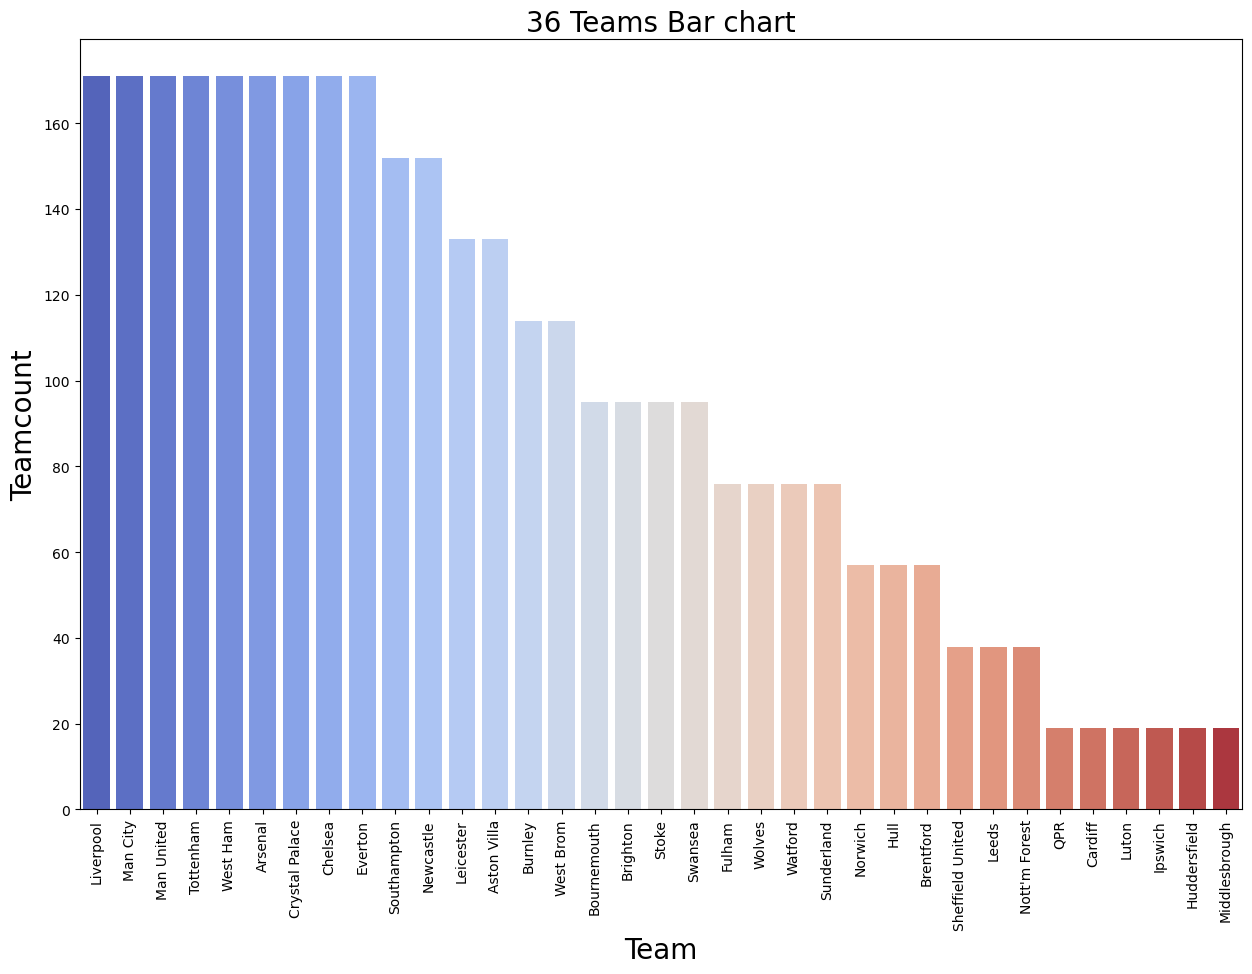

In [100]:
# Create a figure and axes
team = df['HomeTeam'].value_counts().index[:36]
colors = sns.color_palette("coolwarm", len(team))
fig, ax = plt.subplots(figsize=(15, 10))
sns. countplot(
    data=df,
    x='HomeTeam',
    hue='HomeTeam',  
    order=df['HomeTeam'].value_counts().index[:36],
    ax=ax,
    palette=dict(zip(team, colors)),
    legend=False  
)
  
ax.set_title('36 Teams Bar chart', fontsize=20)
ax.set_ylabel('Teamcount', fontsize=20)
ax.set_xlabel('Team', fontsize=20)
ax.tick_params(axis='x', rotation=90)
plt.show()

In [101]:
df.Date.nunique()

989

In [102]:
# setting div as index columns
df_index = df.set_index('Div')
df_index.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,bv_poisson_home_win_prob,bv_poisson_draw_prob,bv_poisson_away_win_prob,bv_poisson_home_goal_exp,bv_poisson_away_goal_exp,dixoncoles_home_win_prob,dixoncoles_draw_prob,dixoncoles_away_win_prob,dixoncoles_home_goal_exp,dixoncoles_away_goal_exp,poisson_home_win_prob,poisson_draw_prob,poisson_away_win_prob,poisson_home_goal_exp,poisson_away_goal_exp,Result_Score,Recent_Form_Home,Recent_Form_Away,Matchup,Head_to_Head,Is_Home,Is_Away,Injured_Players,Missing_Key_Player
Div,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E0,2014-01-01,West Brom,Newcastle,1,0,H,0,0,D,L Mason,13,9,4,3,7,15,3,4,0,0,0,1,2.6,3.4,2.88,2.45,3.20,2.85,2.50,3.30,2.65,2.60,3.40,2.7,2.52,3.42,3.03,2.38,3.3,2.75,2.40,3.40,2.88,2.50,3.4,3.0,38.0,2.60,2.48,3.45,3.32,3.02,2.86,37.0,1.95,1.86,2.04,1.91,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.34515,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.08002,1.875882,0.218212,0.242935,0.538840,0.968331,1.671706,0.222992,0.237252,0.539756,1.014803,1.720342,0.222427,0.238262,0.539311,1.014986,1.720888,1.0,1.0,1.0,Newcastle vs West Brom,H:5 D:3 A:2,1,0,,0
E0,2014-01-01,Fulham,West Ham,2,1,H,1,1,D,M Clattenburg,30,11,11,3,6,5,12,4,2,1,0,1,2.5,3.3,3.10,2.35,3.10,3.10,2.50,3.30,2.65,2.40,3.40,2.9,2.43,3.31,3.26,2.38,3.3,2.75,2.40,3.40,2.88,2.50,3.4,3.0,38.0,2.50,2.39,3.40,3.32,3.26,3.00,37.0,1.80,1.74,2.19,2.06,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.34515,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.08002,1.875882,0.403917,0.256338,0.339740,1.430035,1.290211,0.406652,0.249974,0.343374,1.479956,1.339887,0.406099,0.251096,0.342805,1.479836,1.339739,1.0,1.0,1.0,Fulham vs West Ham,H:5 D:2 A:1,1,0,,0
E0,2014-01-01,Liverpool,Hull,2,0,H,1,0,H,C Pawson,17,10,6,0,15,15,3,4,1,2,0,0,1.3,6.0,11.00,1.25,5.75,10.50,1.27,5.20,10.00,1.30,5.50,10.0,1.31,5.95,11.40,1.22,6.0,9.50,1.25,6.00,11.00,1.30,5.5,10.5,38.0,1.32,1.28,6.42,5.74,12.00,10.49,30.0,1.60,1.53,2.55,2.41,5.138752,1.413822,1.961556,2.319461,2.821224,3.524187,3.518021,3.852221,3.131356,3.658793,3.79632,2.724734,3.715273,4.301378,3.423151,4.122335,4.673684,3.253561,3.824421,4.468816,3.469822,3.910375,4.635033,3.667967,4.242197,4.965752,3.34515,3.957322,4.546112,2.476491,2.369868,2.529326,2.894865,2.108164,2.839197,2.479375,2.383,0.964539,2.708545,1.886741,2.065678,1.901094,2.109459,1.952278,2.08002,1.875882,0.919452,0.056094,0.019004,3.715032,0.472669,0.921023,0.057886,0.021082,3.724764,0.509555,0.920904,0.058140,0.020947,3.724640,0.509418,1.0,1.0,1.0,Hull vs Liverpool,H:5 D:1 A:0,1,0,,0
E0,2014-01-01,Man United,Tottenham,1,2,A,0,1,A,H Webb,16,9,6,4,7,7,13,2,2,1,0,0,1.8,3.8,4.75,1.70,3.80,4.60,1.75,3.50,4.50,1.75,3.75,4.6,1.81,3.82,4.88,1.80,3.6,4.80,1.80,3.75,4.33,1.83,3.8,4.6,38.0,1.83,1.78,3.85,3.65,4.90,4.62,37.0,1.80,1.71,2.20,2.

# Model Building

In [103]:
# Remove low-variance features

X = np.random.rand(100, 5, 2)  # shape: (samples, features, channels)

# Reshape X to 2D if needed
if isinstance(X, np.ndarray) and X.ndim == 3:
    X = X.reshape(X.shape[0], -1)

elif isinstance(X, pd.DataFrame):
    # Flatten each row if it's a DataFrame of arrays
    X = pd.DataFrame([np.ravel(row) for row in X.values])

# Define target vector y (binary classification example)
y = np.random.randint(0, 2, size=X.shape[0])  # shape: (samples,)

# Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

XGBoost (70% Subset) Accuracy: 83.500%
Logistic Regression Accuracy: 97.500%
Random Forest Accuracy: 87.000%
SVM Accuracy: 94.500%


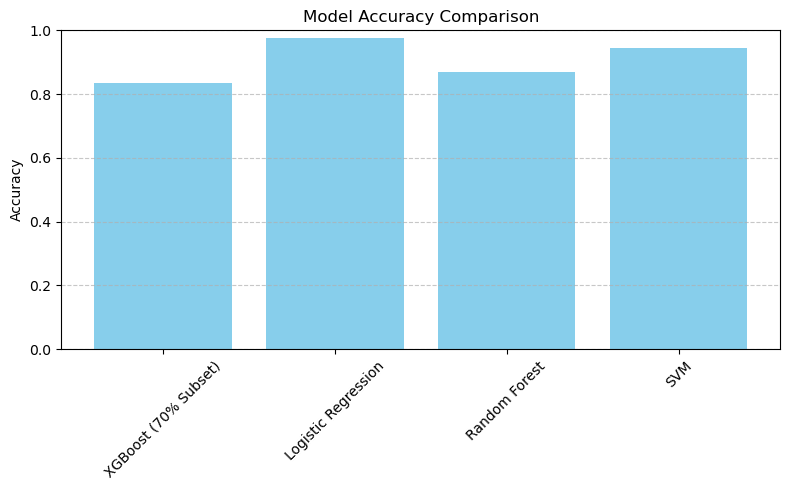

In [104]:
# Example dataset (replace with your own)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=20, noise=0.3, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert continuous target to binary classes
threshold = np.median(y_train)
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Define tuned XGBoost model
xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=40,
    max_depth=2,
    learning_rate=0.04,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=5,
    reg_lambda=5
)

# Subsample 70% of training data for XGBoost
X_train_xgb, _, y_train_xgb, _ = train_test_split(
    X_train, y_train_class, test_size=0.3, random_state=42, stratify=y_train_class
)

# Track accuracies
model_accuracies = {}

# Train XGBoost on 70% subset
xgb_model.fit(X_train_xgb, y_train_xgb)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test_class, xgb_preds)
model_accuracies['XGBoost (70% Subset)'] = xgb_acc
print(f"XGBoost (70% Subset) Accuracy: {xgb_acc:.3%}")

# Train other models on full training data
for name, model in models.items():
    model.fit(X_train, y_train_class)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test_class, preds)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.3%}")

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

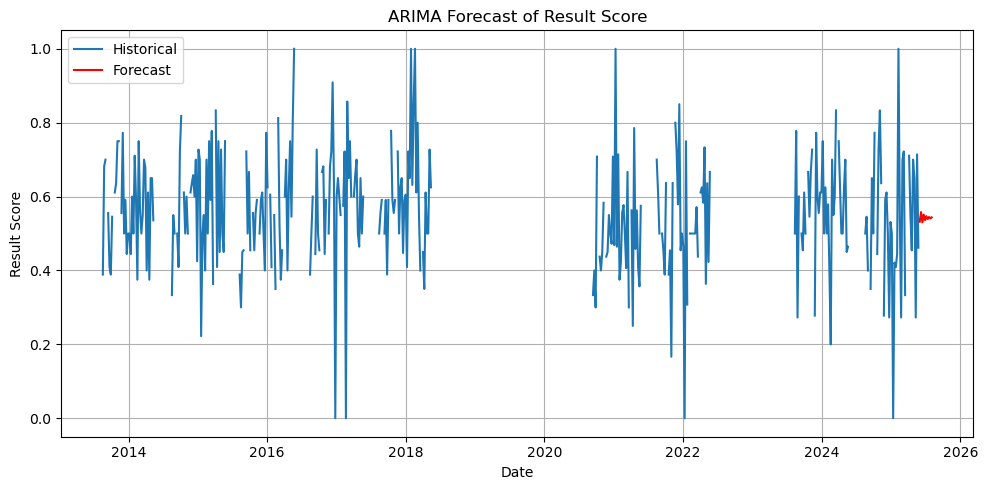

In [105]:


# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Check for required columns
if 'date' not in df.columns or 'result_score' not in df.columns:
    print("Required columns 'date' or 'result_score' not found.")
    print("Available columns:", df.columns)
else:
    # Convert 'date' to datetime and set as index
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])  # Drop rows with invalid dates
    df = df.sort_values('date')
    df.set_index('date', inplace=True)

    # Resample weekly and compute mean
    target_series = df['result_score'].resample('W').mean()

    # Fit ARIMA model
    model = ARIMA(target_series, order=(2, 1, 2))
    model_fit = model.fit()

    # Forecast next 10 weeks
    forecast = model_fit.forecast(steps=10)

    # Generate future weekly dates
    last_date = target_series.index[-1]
    forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=10, freq='W')

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(target_series.index, target_series, label='Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.title('ARIMA Forecast of Result Score')
    plt.xlabel('Date')
    plt.ylabel('Result Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step  


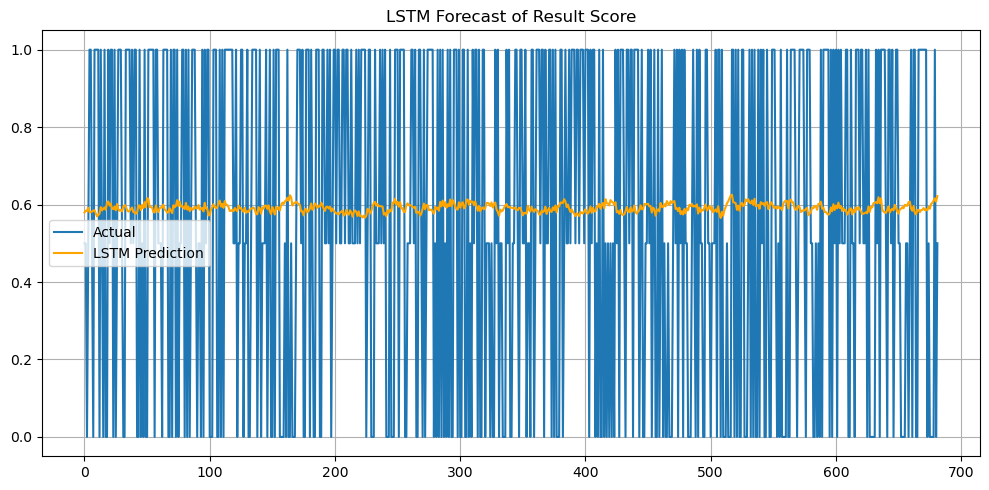

In [106]:


df.columns = df.columns.str.strip().str.lower()

if 'result_score' not in df.columns:
    print(" Column 'result_score' not found.")
else:
    # Prepare time series data
    series = df['result_score'].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaled_series = scaler.fit_transform(series)

    # Create sequences
    def create_sequences(data, seq_length):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 10
    X, y = create_sequences(scaled_series, seq_length)

    # Split into train/test
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Build LSTM model
    model = Sequential([
        Input(shape=(seq_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=20, verbose=0)

    # Predict
    predictions = model.predict(X_test)
    predicted_scores = scaler.inverse_transform(predictions)

    # Plot
    plt.figure(figsize=(10, 5))
    actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    plt.plot(actual, label='Actual')
    plt.plot(predicted_scores, label='LSTM Prediction', color='orange')
    plt.title('LSTM Forecast of Result Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Evaluation Metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

 Dual Predictions:
   match_id   HomeTeam   AwayTeam  home_win_pred  home_confidence  \
0       101    Arsenal   Man City              0         0.480760   
1       102    Chelsea  Tottenham              0         0.093627   
2       103  Liverpool    Everton              1         0.986635   
3       104   Man City    Arsenal              1         0.533955   
4       105    Everton    Chelsea              0         0.025768   

   away_win_pred  away_confidence  
0              1         0.533955  
1              1         0.987355  
2              0         0.005587  
3              0         0.480760  
4              1         0.952186  


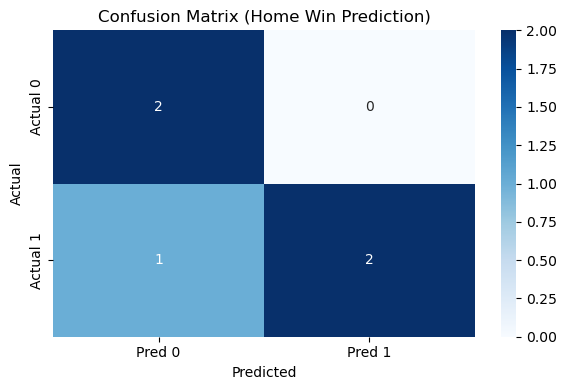

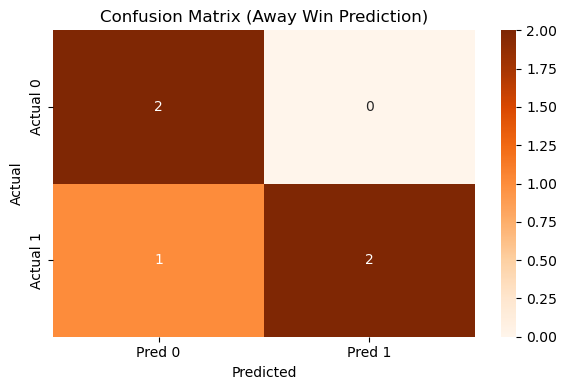

In [113]:
# sample match data
df_matches = pd.DataFrame({
    'match_id': [101, 102, 103, 104, 105],
    'HomeTeam': ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Everton'],
    'AwayTeam': ['Man City', 'Tottenham', 'Everton', 'Arsenal', 'Chelsea'],
    'predicted_score': [None, None, None, None, None],
    'actual_result': [1, 0, 1, 1, 0]  # 1 = HomeTeam wins, 0 = AwayTeam wins
})

# Create dual perspective data
df_home = df_matches.copy()
df_home['target_team'] = df_home['HomeTeam']
df_home['opponent_team'] = df_home['AwayTeam']
df_home['label'] = df_home['actual_result']  # Home win

df_away = df_matches.copy()
df_away['target_team'] = df_away['AwayTeam']
df_away['opponent_team'] = df_away['HomeTeam']
df_away['label'] = 1 - df_away['actual_result']  # Away win

df_dual = pd.concat([df_home, df_away], ignore_index=True)

# One-hot encode team names
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_raw_dual = df_dual[['target_team', 'opponent_team']]
X_encoded_dual = encoder.fit_transform(X_raw_dual)
X_dual = np.array(X_encoded_dual, dtype='float32')
y_dual = np.array(df_dual['label'], dtype='float32')

# Train Keras model
model = Sequential([
    Input(shape=(X_dual.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_dual, y_dual, epochs=20, verbose=0)

# Predict for home team
home_raw = pd.DataFrame({
    'target_team': df_matches['HomeTeam'],
    'opponent_team': df_matches['AwayTeam']
})
home_encoded = encoder.transform(home_raw)
home_pred_proba = model.predict(home_encoded).flatten()
home_pred = (home_pred_proba > 0.5).astype(int)

# Predict for away team
away_raw = pd.DataFrame({
    'target_team': df_matches['AwayTeam'],
    'opponent_team': df_matches['HomeTeam']
})
away_encoded = encoder.transform(away_raw)
away_pred_proba = model.predict(away_encoded).flatten()
away_pred = (away_pred_proba > 0.5).astype(int)

# 7. Attach predictions
df_matches['home_win_pred'] = home_pred
df_matches['home_confidence'] = home_pred_proba
df_matches['away_win_pred'] = away_pred
df_matches['away_confidence'] = away_pred_proba

# Display predictions
print("\n Dual Predictions:")
print(df_matches[['match_id', 'HomeTeam', 'AwayTeam',
                  'home_win_pred', 'home_confidence',
                  'away_win_pred', 'away_confidence']])

# Evaluate home predictions
acc = accuracy_score(df_matches['actual_result'], df_matches['home_win_pred'])
prec = precision_score(df_matches['actual_result'], df_matches['home_win_pred'])
rec = recall_score(df_matches['actual_result'], df_matches['home_win_pred'])
f1 = f1_score(df_matches['actual_result'], df_matches['home_win_pred'])
roc = roc_auc_score(df_matches['actual_result'], df_matches['home_confidence'])
logloss = log_loss(df_matches['actual_result'], df_matches['home_confidence'])
cm = confusion_matrix(df_matches['actual_result'], df_matches['home_win_pred'])

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Home Win Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix (Away Win Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Yellow card stats

📊 Yellow Card Summary:
🔸 Total Home Yellow Cards: 12
🔹 Total Away Yellow Cards: 11
🔸 Average Home Yellow Cards: 2.40
🔹 Average Away Yellow Cards: 2.20
🔸 Max Home Yellow Cards: 4
🔹 Max Away Yellow Cards: 4
🔸 Min Home Yellow Cards: 1
🔹 Min Away Yellow Cards: 1


<Figure size 800x500 with 0 Axes>

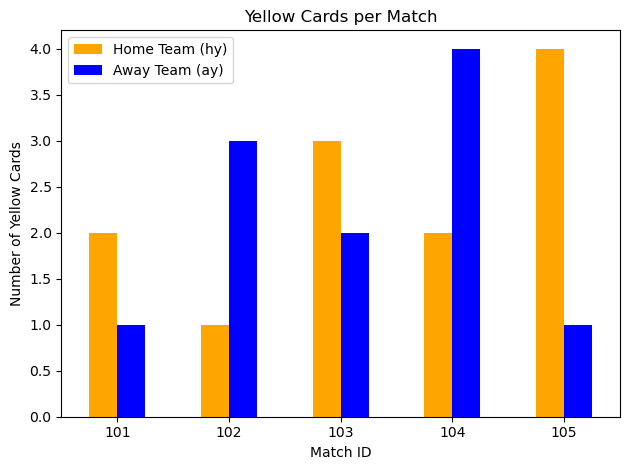

In [108]:
df_matches = pd.DataFrame({
    'match_id': [101, 102, 103, 104, 105],
    'HomeTeam': ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Everton'],
    'AwayTeam': ['Man City', 'Tottenham', 'Everton', 'Arsenal', 'Chelsea'],
    'actual_result': [1, 0, 1, 1, 0],  # 1 = Home win
    'hy': [2, 1, 3, 2, 4],  # Home yellow cards
    'ay': [1, 3, 2, 4, 1]   # Away yellow cards
})

# Overall stats
total_home_yellows = df_matches['hy'].sum()
total_away_yellows = df_matches['ay'].sum()

avg_home_yellows = df_matches['hy'].mean()
avg_away_yellows = df_matches['ay'].mean()

max_home_yellows = df_matches['hy'].max()
max_away_yellows = df_matches['ay'].max()

min_home_yellows = df_matches['hy'].min()
min_away_yellows = df_matches['ay'].min()

print("📊 Yellow Card Summary:")
print(f"🔸 Total Home Yellow Cards: {total_home_yellows}")
print(f"🔹 Total Away Yellow Cards: {total_away_yellows}")
print(f"🔸 Average Home Yellow Cards: {avg_home_yellows:.2f}")
print(f"🔹 Average Away Yellow Cards: {avg_away_yellows:.2f}")
print(f"🔸 Max Home Yellow Cards: {max_home_yellows}")
print(f"🔹 Max Away Yellow Cards: {max_away_yellows}")
print(f"🔸 Min Home Yellow Cards: {min_home_yellows}")
print(f"🔹 Min Away Yellow Cards: {min_away_yellows}")

plt.figure(figsize=(8, 5))
df_matches[['hy', 'ay']].plot(kind='bar', stacked=False, color=['orange', 'blue'])
plt.xticks(ticks=range(len(df_matches)), labels=df_matches['match_id'], rotation=0)
plt.title("Yellow Cards per Match")
plt.xlabel("Match ID")
plt.ylabel("Number of Yellow Cards")
plt.legend(['Home Team (hy)', 'Away Team (ay)'])
plt.tight_layout()
plt.show()

# Fouls Stats

📊 Fouls Summary:
🔸 Total Home Fouls: 53
🔹 Total Away Fouls: 51
🔸 Average Home Fouls: 10.60
🔹 Average Away Fouls: 10.20


<Figure size 800x500 with 0 Axes>

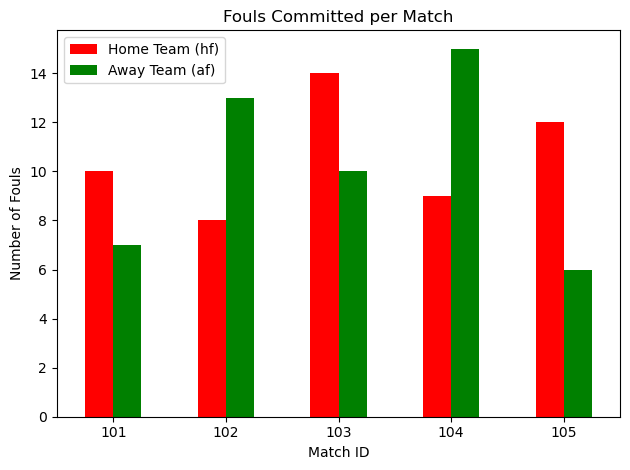

In [109]:
df_matches = pd.DataFrame({
    'match_id': [101, 102, 103, 104, 105],
    'HomeTeam': ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Everton'],
    'AwayTeam': ['Man City', 'Tottenham', 'Everton', 'Arsenal', 'Chelsea'],
    'actual_result': [1, 0, 1, 1, 0],  
    'hy': [2, 1, 3, 2, 4],             
    'ay': [1, 3, 2, 4, 1],             
    'hf': [10, 8, 14, 9, 12],          
    'af': [7, 13, 10, 15, 6]           
})

# Total and average fouls
total_home_fouls = df_matches['hf'].sum()
total_away_fouls = df_matches['af'].sum()

avg_home_fouls = df_matches['hf'].mean()
avg_away_fouls = df_matches['af'].mean()

print("📊 Fouls Summary:")
print(f"🔸 Total Home Fouls: {total_home_fouls}")
print(f"🔹 Total Away Fouls: {total_away_fouls}")
print(f"🔸 Average Home Fouls: {avg_home_fouls:.2f}")
print(f"🔹 Average Away Fouls: {avg_away_fouls:.2f}")

plt.figure(figsize=(8, 5))
df_matches[['hf', 'af']].plot(kind='bar', stacked=False, color=['red', 'green'])
plt.xticks(ticks=range(len(df_matches)), labels=df_matches['match_id'], rotation=0)
plt.title("Fouls Committed per Match")
plt.xlabel("Match ID")
plt.ylabel("Number of Fouls")
plt.legend(['Home Team (hf)', 'Away Team (af)'])
plt.tight_layout()
plt.show()

# Shot Stats

📊 Shot Summary:
🔸 Avg Home Shots: 11.00
🔹 Avg Away Shots: 11.20
🔸 Avg Home Shots on Target: 4.80
🔹 Avg Away Shots on Target: 4.80


<Figure size 800x500 with 0 Axes>

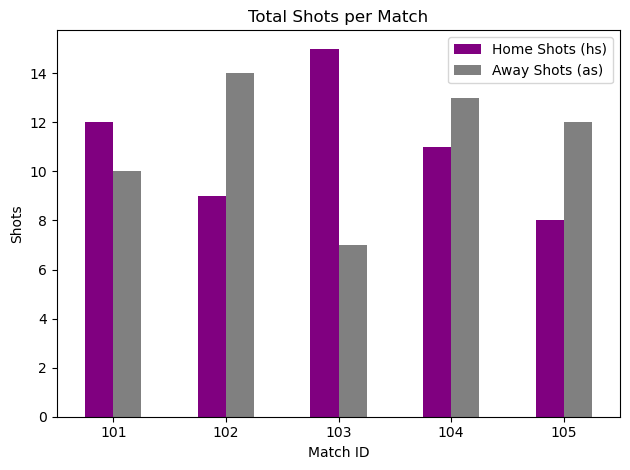

<Figure size 800x500 with 0 Axes>

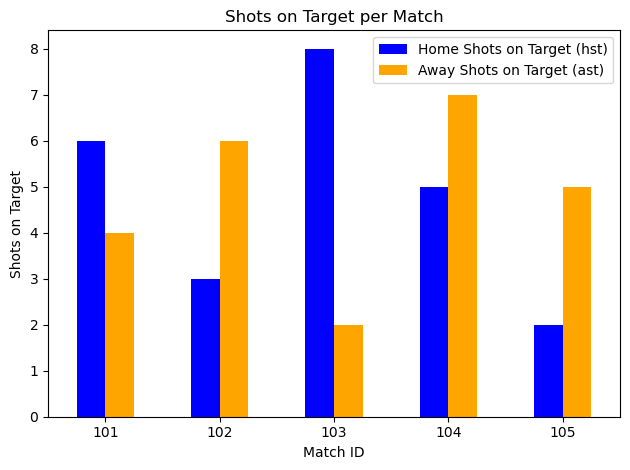

In [110]:
df_matches = pd.DataFrame({
    'match_id': [101, 102, 103, 104, 105],
    'HomeTeam': ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Everton'],
    'AwayTeam': ['Man City', 'Tottenham', 'Everton', 'Arsenal', 'Chelsea'],
    'actual_result': [1, 0, 1, 1, 0],  
    'hy': [2, 1, 3, 2, 4],             
    'ay': [1, 3, 2, 4, 1],             
    'hf': [10, 8, 14, 9, 12],          
    'af': [7, 13, 10, 15, 6],          
    'hs': [12, 9, 15, 11, 8],          
    'as': [10, 14, 7, 13, 12],         
    'hst': [6, 3, 8, 5, 2],            
    'ast': [4, 6, 2, 7, 5]             
})

print("📊 Shot Summary:")
print(f"🔸 Avg Home Shots: {df_matches['hs'].mean():.2f}")
print(f"🔹 Avg Away Shots: {df_matches['as'].mean():.2f}")
print(f"🔸 Avg Home Shots on Target: {df_matches['hst'].mean():.2f}")
print(f"🔹 Avg Away Shots on Target: {df_matches['ast'].mean():.2f}")

# Total shots
plt.figure(figsize=(8, 5))
df_matches[['hs', 'as']].plot(kind='bar', color=['purple', 'gray'])
plt.xticks(ticks=range(len(df_matches)), labels=df_matches['match_id'], rotation=0)
plt.title("Total Shots per Match")
plt.xlabel("Match ID")
plt.ylabel("Shots")
plt.legend(['Home Shots (hs)', 'Away Shots (as)'])
plt.tight_layout()
plt.show()

# Shots on target
plt.figure(figsize=(8, 5))
df_matches[['hst', 'ast']].plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=range(len(df_matches)), labels=df_matches['match_id'], rotation=0)
plt.title("Shots on Target per Match")
plt.xlabel("Match ID")
plt.ylabel("Shots on Target")
plt.legend(['Home Shots on Target (hst)', 'Away Shots on Target (ast)'])
plt.tight_layout()
plt.show()

# Red Cards Stats

📊 Red Card Summary:
🔸 Total Home Red Cards: 2
🔹 Total Away Red Cards: 2
🔸 Avg Home Red Cards: 0.40
🔹 Avg Away Red Cards: 0.40


<Figure size 800x500 with 0 Axes>

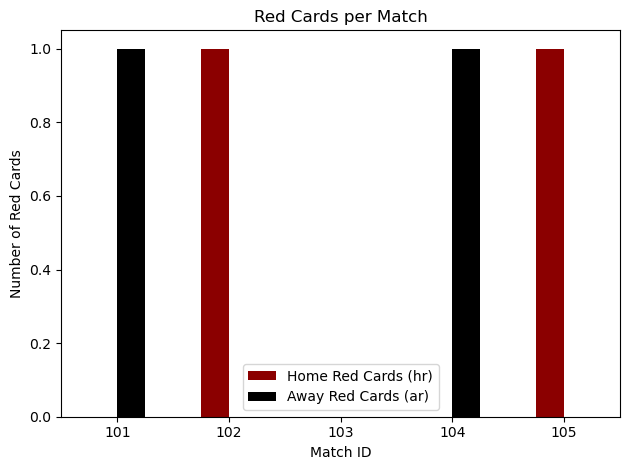

In [111]:
df_matches = pd.DataFrame({
    'match_id': [101, 102, 103, 104, 105],
    'HomeTeam': ['Arsenal', 'Chelsea', 'Liverpool', 'Man City', 'Everton'],
    'AwayTeam': ['Man City', 'Tottenham', 'Everton', 'Arsenal', 'Chelsea'],
    'actual_result': [1, 0, 1, 1, 0],
    'hy': [2, 1, 3, 2, 4],             
    'ay': [1, 3, 2, 4, 1],             
    'hf': [10, 8, 14, 9, 12],         
    'af': [7, 13, 10, 15, 6],          
    'hs': [12, 9, 15, 11, 8],          
    'as': [10, 14, 7, 13, 12],         
    'hst': [6, 3, 8, 5, 2],            
    'ast': [4, 6, 2, 7, 5],            
    'hr': [0, 1, 0, 0, 1],             
    'ar': [1, 0, 0, 1, 0]              
})

print("📊 Red Card Summary:")
print(f"🔸 Total Home Red Cards: {df_matches['hr'].sum()}")
print(f"🔹 Total Away Red Cards: {df_matches['ar'].sum()}")
print(f"🔸 Avg Home Red Cards: {df_matches['hr'].mean():.2f}")
print(f"🔹 Avg Away Red Cards: {df_matches['ar'].mean():.2f}")

plt.figure(figsize=(8, 5))
df_matches[['hr', 'ar']].plot(kind='bar', color=['darkred', 'black'])
plt.xticks(ticks=range(len(df_matches)), labels=df_matches['match_id'], rotation=0)
plt.title("Red Cards per Match")
plt.xlabel("Match ID")
plt.ylabel("Number of Red Cards")
plt.legend(['Home Red Cards (hr)', 'Away Red Cards (ar)'])
plt.tight_layout()
plt.show()